In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [24]:
Nt = 11
Nx = 6
Ny = 6

x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Nx)
t = np.linspace(0,1,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

alpha = 1
beta = 1

lambda_ = (alpha*deltat)/deltax**2
mu_ = (beta*deltat)/deltay**2

print(deltat, lambda_,mu_)

0.1 2.4999999999999996 2.4999999999999996


In [7]:
def Ti(x,y):
    return np.sin(np.pi*(x+y))

In [25]:
def InitT():
    
    T = np.zeros((Nt,Nx,Ny))
    
    T[0,:,:] = Ti(x,y)
    
    T[:,:,0] = np.sin(np.pi*y)
    T[:,:,-1] = np.sin(np.pi*(1+y))
    T[:,0,:] = np.sin(np.pi*x)
    T[:,-1,:] = np.sin(np.pi*(1+x))
    
    return T

In [26]:
T = InitT()
print(T[0,:,:])

[[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
   5.87785252e-01  1.22464680e-16]
 [ 5.87785252e-01  9.51056516e-01  5.87785252e-01 -5.87785252e-01
  -9.51056516e-01 -5.87785252e-01]
 [ 9.51056516e-01  9.51056516e-01  5.87785252e-01 -5.87785252e-01
  -9.51056516e-01 -9.51056516e-01]
 [ 9.51056516e-01  9.51056516e-01  5.87785252e-01 -5.87785252e-01
  -9.51056516e-01 -9.51056516e-01]
 [ 5.87785252e-01  9.51056516e-01  5.87785252e-01 -5.87785252e-01
  -9.51056516e-01 -5.87785252e-01]
 [ 1.22464680e-16 -5.87785252e-01 -9.51056516e-01 -9.51056516e-01
  -5.87785252e-01 -2.44929360e-16]]


In [18]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        T[l,:,0] = np.exp(-2*(np.pi**2)*l) * np.sin(np.pi*y)
        T[l,:,-1] = np.exp(-2*(np.pi**2)*l) * np.sin(np.pi*(1+y))
        T[l,0,:] = np.exp(-2*(np.pi**2)*l) * np.sin(np.pi*x)
        T[l,-1,:] = np.exp(-2*(np.pi**2)*l) * np.sin(np.pi*(1+x))
        
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])
                

In [19]:
GetSolution()

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10036.62it/s]


In [23]:
T[-1,:,:]

array([[ 0.00000000e+000,  1.10388565e-086,  1.78612449e-086,
         1.78612449e-086,  1.10388565e-086,  2.29993866e-102],
       [ 1.10388565e-086,  6.01867860e+008,  5.66404676e+008,
        -1.07581661e+009, -9.16701750e+008, -1.10388565e-086],
       [ 1.78612449e-086, -5.66374023e+008,  4.73819532e+008,
         3.49946826e+008,  1.07548963e+009, -1.78612449e-086],
       [ 1.78612449e-086, -1.07548963e+009, -3.49946826e+008,
        -4.73819532e+008,  5.66374023e+008, -1.78612449e-086],
       [ 1.10388565e-086,  9.16701750e+008,  1.07581661e+009,
        -5.66404676e+008, -6.01867860e+008, -1.10388565e-086],
       [ 2.29993866e-102, -1.10388565e-086, -1.78612449e-086,
        -1.78612449e-086, -1.10388565e-086, -4.59987731e-102]])

<IPython.core.display.Javascript object>


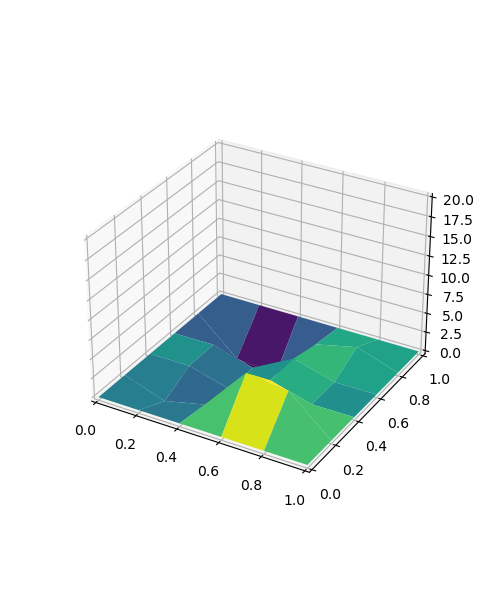

In [39]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(0,20)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)